In [45]:
# !pip install xgboost

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.linear_model import Lasso
# import xgboost as xgb
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from typing import List, Dict,Tuple,Any
from scipy.stats import chi2_contingency
import scipy.stats as stats

# Pipeline imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#import LogisticRegression
from sklearn.linear_model import LogisticRegression
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import TransformerMixin
#impory accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import pickle

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [47]:
#list names of all files
os.listdir('data')


['leads.csv', 'rates_land.csv', 'rates_sea.csv', 'rates_air.csv']

In [48]:
#read the data
list_of_files = os.listdir('data')
leads, air, land, sea = [pd.read_csv('data/' + file) for file in list_of_files]

In [49]:
leads


,request_id,request_date,valid_date_from,valid_date_to,weight,weight_unit,amount,container_type,shipping_type,hs_code,...,liquid_cargo,imo_code,city_from_country,city_from,port_from_country,port_from,port_to_country,port_to,city_to_country,city_to
0,855641,2023-09-05,2023-09-16,2023-09-23,26.63,Metric Ton,1.0,40' Refrigerated,FCL,06-14,...,False,NaN,NaN,NaN,ID,Jakarta,BD,Chittagong,NaN,NaN
1,855652,2023-09-05,2023-09-30,2023-10-07,28.00,Metric Ton,1.0,20' Standard,FCL,25-27,...,False,NaN,NaN,NaN,BR,Vitoria,US,Houston,US,"Houston, TX, USA"
2,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,False,NaN,NaN,NaN,CN,Chengdu,DO,Caucedo,DO,Dominican Republic
3,855689,2023-09-05,2023-09-30,2023-10-07,26.00,Metric Ton,20.0,40' Standard,FCL,0910,...,False,NaN,NaN,NaN,NG,Apapa,AE,Jebel Ali,AE,Mina Jebel Ali - Dubai - United Arab Emirates
4,855725,2023-09-05,2023-09-20,2023-09-27,250.00,Metric Ton,NaN,NaN,LCL,8711,...,False,NaN,NaN,NaN,IN,Chennai,DE,FRANKFURT AM MAIN,DE,"Frankfurt, Germany"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,941678,2024-03-05,2024-06-09,2024-06-16,30.00,Kilogram,NaN,NaN,LCL,NaN,...,False,NaN,IT,"Padua, Province of Padua, Italy",IT,Venice,CA,Toronto,CA,"Toronto, ON, Canada"
9894,941682,2024-03-05,2024-03-05,2024-03-12,28.23,Metric Ton,1.0,20' Standard,FCL,94-96,...,False,NaN,NaN,NaN,BR,Rio De Jan Eiro,SG,Singapore,NaN,NaN
9895,941683,2024-03-05,2024-06-09,2024-06-09,310.00,Kilogram,NaN,NaN,LCL,NaN,...,False,NaN,IT,"Padua, Province of Padua, Italy",IT,Venice,CA,Toronto,CA,"Toronto, ON, Canada"
9896,941687,2024-03-05,2024-04-06,2024-04-13,28.00,Metric Ton,1.0,20' Standard,FCL,50-63,...,False,NaN,ZA,"Cape Town City Centre, Cape Town, 8000, South ...",ZA,Cape Town,US,Charleston,NaN,NaN


In [50]:
air


,create_date,valid_from,valid_to,estimated_days,origin_country,origin_name,destination_country,destination_name,shipping_type,load_type,load_amount,price_usd
0,2024-02-11,2024-02-01,2024-12-31,6.0,ZW,"Harare, Zimbabwe",MZ,"Maputo, Mozambique",RAIL_FCL,40' Standard,1,2430.00
1,2024-02-11,2024-02-01,2024-12-31,6.0,ZW,"Harare, Zimbabwe",MZ,"Maputo, Mozambique",RAIL_FCL,20' Standard,1,1850.00
2,2024-02-11,2024-01-01,2024-12-31,5.0,MZ,"Beira, Mozambique",ZW,"Harare, Zimbabwe",RAIL_FCL,40' Standard,1,1850.00
3,2024-02-11,2024-01-01,2024-12-31,5.0,MZ,"Beira, Mozambique",ZW,"Harare, Zimbabwe",RAIL_FCL,20' Standard,1,1180.00
4,2024-02-11,2024-01-01,2024-12-31,5.0,ZW,"Harare, Zimbabwe",MZ,"Beira, Mozambique",RAIL_FCL,20' Standard,1,1180.00
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-10-09,2023-10-10,2023-10-11,NaN,US,"Los Angeles, CA, USA",US,"Via Cabrillo-Marina, San Pedro, CA 90731, USA",LTL,mt,1,293.79
996,2023-10-09,2023-11-24,2023-11-28,NaN,GB,"Victoria Embankment Gardens, Villiers St, Lond...",GB,"Cheshire, UK",LTL,mt,1,118.70
997,2023-10-09,2023-10-10,2023-10-12,NaN,US,"Los Angeles, CA, USA",US,"Via Cabrillo-Marina, San Pedro, CA 90731, USA",LTL,mt,1,135.94
998,2023-10-09,2023-11-29,2023-12-01,NaN,GB,"Victoria Embankment Gardens, Villiers St, Lond...",GB,"Cheshire, UK",LTL,mt,1,118.70


In [51]:
rates_air_renamed = air.rename(columns={
    'origin_country': 'port_from_country',
    'destination_country': 'port_to_country',
    'load_type': 'container_type'
})

# Объединение данных о запросах с тарифами для авиаперевозок.
# В реальной ситуации потребуется учитывать периоды действия тарифов, что может потребовать дополнительной обработки.
merged_leads_air = pd.merge(
    leads,
    rates_air_renamed,
    how='inner',
    on=['port_from_country', 'port_to_country', 'container_type']
)

merged_leads_air.head()


,request_id,request_date,valid_date_from,valid_date_to,weight,weight_unit,amount,container_type,shipping_type_x,hs_code,...,city_to,create_date,valid_from,valid_to,estimated_days,origin_name,destination_name,shipping_type_y,load_amount,price_usd
0,867146,2023-09-29,2023-10-01,2023-10-08,25.0,Metric Ton,1.0,40' Standard,FCL,94-96,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Madrid, Spain",RAIL_FCL,1,9900.0
1,870321,2023-10-07,2023-10-25,2023-11-01,6.0,Metric Ton,1.0,40' Standard,FCL,84-85,...,"Le Havre, France",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Lyon Metropolis, France",RAIL_FCL,1,9450.0
2,878371,2023-10-25,2023-11-26,2023-12-03,7.0,Metric Ton,1.0,40' Standard,FCL,482369,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Lyon Metropolis, France",RAIL_FCL,1,9450.0
3,881615,2023-11-01,2023-11-30,2023-12-07,24.0,Metric Ton,1.0,40' Standard,FCL,392062,...,NaN,2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Madrid, Spain",RAIL_FCL,1,9900.0
4,887094,2023-11-20,2023-11-30,2023-12-07,20.0,Metric Ton,1.0,40' Standard,FCL,842951,...,"Katowice, Poland",2023-11-28,2023-11-28,2023-12-31,NaN,"Wuhan, Hubei, China","Małaszewicze, Poland",RAIL_FCL,1,7450.0


In [52]:
merged_leads_air['price_usd']

0     9900.0
1     9450.0
2     9450.0
3     9900.0
4     7450.0
5     8250.0
6     8250.0
7     9900.0
8     7450.0
9     9750.0
10    9900.0
11    9900.0
12    9900.0
13    9900.0
14    9900.0
15    9450.0
16    9750.0
17    9450.0
18    9750.0
19    7450.0
Name: price_usd, dtype: float64

In [53]:
# Подготовка и объединение данных о запросах на перевозку с тарифами для наземных перевозок.
rates_land_renamed = land.rename(columns={
    'origin_country': 'port_from_country',
    'destination_country': 'port_to_country',
    'load_type': 'container_type'
})
merged_leads_land = pd.merge(
    leads,
    rates_land_renamed,
    how='left',
    on=['port_from_country', 'port_to_country', 'container_type']
)

# Подготовка и объединение данных о запросах на перевозку с тарифами для морских перевозок.
rates_sea_renamed = sea.rename(columns={
    'origin_country': 'port_from_country',
    'destination_country': 'port_to_country',
    'load_type': 'container_type'
})
merged_leads_sea = pd.merge(
    leads,
    rates_sea_renamed,
    how='left',
    on=['port_from_country', 'port_to_country', 'container_type']
)



In [54]:
merged_leads_land['price_usd'].describe()


count    3161.000000
mean     2605.406478
std       950.939758
min        80.000000
25%      2050.000000
50%      2383.000000
75%      2950.000000
max      9394.000000
Name: price_usd, dtype: float64

In [55]:
# merged_leads_land анализ
#в основном цены только на leads_land

In [56]:
merged_leads_land['price_usd'].describe()

count    3161.000000
mean     2605.406478
std       950.939758
min        80.000000
25%      2050.000000
50%      2383.000000
75%      2950.000000
max      9394.000000
Name: price_usd, dtype: float64

In [57]:
merged_leads_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12554 entries, 0 to 12553
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   request_id         12554 non-null  int64  
 1   request_date       12554 non-null  object 
 2   valid_date_from    12554 non-null  object 
 3   valid_date_to      12554 non-null  object 
 4   weight             12554 non-null  float64
 5   weight_unit        12554 non-null  object 
 6   amount             10179 non-null  float64
 7   container_type     10424 non-null  object 
 8   shipping_type_x    12554 non-null  object 
 9   hs_code            9689 non-null   object 
 10  freight_all_kinds  12554 non-null  bool   
 11  personal_cargo     12554 non-null  bool   
 12  perishable_cargo   12554 non-null  bool   
 13  liquid_cargo       12554 non-null  bool   
 14  imo_code           98 non-null     float64
 15  city_from_country  6348 non-null   object 
 16  city_from          635

In [58]:
#sepatare data for null and not null
merged_leads_land_null = merged_leads_land[merged_leads_land['price_usd'].isnull()]
merged_leads_land_not_null = merged_leads_land[merged_leads_land['price_usd'].notnull()]


In [59]:
merged_leads_land_not_null

,request_id,request_date,valid_date_from,valid_date_to,weight,weight_unit,amount,container_type,shipping_type_x,hs_code,...,valid_to,carrier,estimated_days,origin_name,origin_code5,destination_name,destination_code5,shipping_type_y,load_amount,price_usd
2,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,2024-04-14,NaN,42.0,Shanghai,CNSHA,Caucedo,DOCAU,FCL,1.0,3467.0
3,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,2024-04-15,MSC,31.0,Shanghai,CNSHA,Caucedo,DOCAU,FCL,1.0,3420.0
4,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,2024-04-14,OOCL,42.0,Shanghai,CNSHA,Caucedo,DOCAU,FCL,1.0,3288.0
5,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,2024-04-28,NaN,43.0,Shanghai,CNSHA,Caucedo,DOCAU,FCL,1.0,3087.0
6,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,2024-04-14,NaN,42.0,Shanghai,CNSHA,Caucedo,DOCAU,FCL,1.0,3087.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12527,941621,2024-03-05,2024-03-08,2024-03-15,2.40,Metric Ton,1.0,20' Standard,FCL,851631,...,2024-04-24,ONE,51.0,Yantian,CNYTN,Southampton,GBSOU,FCL,1.0,2043.0
12546,941675,2024-03-05,2024-03-05,2024-03-12,0.76,Metric Ton,25845.0,40' Standard,FCL,50-63,...,2024-04-15,NaN,38.0,Ningbo,CNNGB,Cartagena,COCTG,FCL,1.0,3414.0
12547,941675,2024-03-05,2024-03-05,2024-03-12,0.76,Metric Ton,25845.0,40' Standard,FCL,50-63,...,2024-04-22,COSCO,39.0,Ningbo,CNNGB,Cartagena,COCTG,FCL,1.0,3400.0
12552,941690,2024-03-05,2024-04-05,2024-04-12,10.00,Metric Ton,1.0,40' Standard,FCL,84-85,...,2024-04-15,NaN,38.0,Ningbo,CNNGB,Cartagena,COCTG,FCL,1.0,3414.0


In [60]:
#Проверка форматов данных

In [61]:
merged_leads_land_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 2 to 12553
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   request_id         3161 non-null   int64  
 1   request_date       3161 non-null   object 
 2   valid_date_from    3161 non-null   object 
 3   valid_date_to      3161 non-null   object 
 4   weight             3161 non-null   float64
 5   weight_unit        3161 non-null   object 
 6   amount             3161 non-null   float64
 7   container_type     3161 non-null   object 
 8   shipping_type_x    3161 non-null   object 
 9   hs_code            2459 non-null   object 
 10  freight_all_kinds  3161 non-null   bool   
 11  personal_cargo     3161 non-null   bool   
 12  perishable_cargo   3161 non-null   bool   
 13  liquid_cargo       3161 non-null   bool   
 14  imo_code           6 non-null      float64
 15  city_from_country  1375 non-null   object 
 16  city_from          1375 non-

In [62]:
def dataframe_metainformation(df):
  meta = dict()
  descr = pd.DataFrame({'dtype': df.dtypes, 'NAs': df.isna().sum()})
  categorical_features = descr.loc[descr['dtype'] == 'object'].index.values.tolist()
  numerical_features = descr.loc[descr['dtype'] != 'object'].index.values.tolist()
  numerical_features_na = descr.loc[(descr['dtype'] != 'object') & (descr['NAs'] > 0)].index.values.tolist()
  categorical_features_na = descr.loc[(descr['dtype'] == 'object') & (descr['NAs'] > 0)].index.values.tolist()
  complete_features = descr.loc[descr['NAs'] == 0].index.values.tolist()
  meta['description'] = descr
  meta['categorical_features'] = categorical_features
  meta['categorical_features'] = categorical_features
  meta['categorical_features_na'] = categorical_features_na
  meta['numerical_features'] = numerical_features
  meta['numerical_features_na'] = numerical_features_na
  meta['complete_features'] = complete_features
  return meta

def print_metainformation(meta):
  print('Available types:', meta['description']['dtype'].unique())
  print('{} Features'.format(meta['description'].shape[0]))
  print('{} categorical features'.format(len(meta['categorical_features'])))
  print('{} numerical features'.format(len(meta['numerical_features'])))
  print('{} categorical features with NAs'.format(len(meta['categorical_features_na'])))
  print('{} numerical features with NAs'.format(len(meta['numerical_features_na'])))
  print('{} Complete features'.format(len(meta['complete_features'])))

In [63]:
meta = dataframe_metainformation(merged_leads_land_not_null)
print_metainformation(meta)

Available types: [dtype('int64') dtype('O') dtype('float64') dtype('bool')]
35 Features
24 categorical features
11 numerical features
6 categorical features with NAs
2 numerical features with NAs
27 Complete features


In [64]:
temp=merged_leads_land_not_null.isnull().sum()
temp = pd.DataFrame(temp)
mapping = {temp.columns[0]:'Count'}
temp = temp.rename(columns=mapping)
temp.style.set_properties(subset=['Count'], **{'width': '1000px'})

,Count
request_id,0
request_date,0
valid_date_from,0
valid_date_to,0
weight,0
weight_unit,0
amount,0
container_type,0
shipping_type_x,0
hs_code,702


In [65]:
temp['percent_nan'] = temp['Count']/merged_leads_land_not_null.shape[0]


In [66]:
temp['percent_nan'].to_frame().style.set_properties(subset=['percent_nan'], **{'width': '1000px'})

,percent_nan
request_id,0.000000
request_date,0.000000
valid_date_from,0.000000
valid_date_to,0.000000
weight,0.000000
weight_unit,0.000000
amount,0.000000
container_type,0.000000
shipping_type_x,0.000000
hs_code,0.222082


In [67]:
df = merged_leads_land_not_null.copy()


In [68]:
columns_to_drop = ['request_id']
df = df.drop(columns=columns_to_drop)

In [69]:
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=1, thresh=0.5*len(df))
df = df.loc[:, df.apply(pd.Series.nunique) != 1]


In [70]:
df.columns

Index(['request_date', 'valid_date_from', 'valid_date_to', 'weight',
       'weight_unit', 'amount', 'container_type', 'shipping_type_x', 'hs_code',
       'freight_all_kinds', 'personal_cargo', 'perishable_cargo',
       'liquid_cargo', 'port_from_country', 'port_from', 'port_to_country',
       'port_to', 'valid_from', 'valid_to', 'carrier', 'estimated_days',
       'origin_name', 'origin_code5', 'destination_name', 'destination_code5',
       'price_usd'],
      dtype='object')

In [71]:
df.shape

(3161, 26)

In [72]:
df['valid_days'] = pd.to_datetime(df['valid_date_to']) - pd.to_datetime(df['valid_date_from'])
df['valid_days'] = df['valid_days'].dt.days
df = df.drop(columns=['valid_date_to', 'valid_date_from'])



In [73]:
object_cols = df.select_dtypes(include=['object']).columns
#exclude columns with datetime type
object_cols = object_cols.drop(['request_date', 'valid_from', 'valid_to'])
df[object_cols] = df[object_cols].fillna('missing')


Column hs_code has 204 unique values


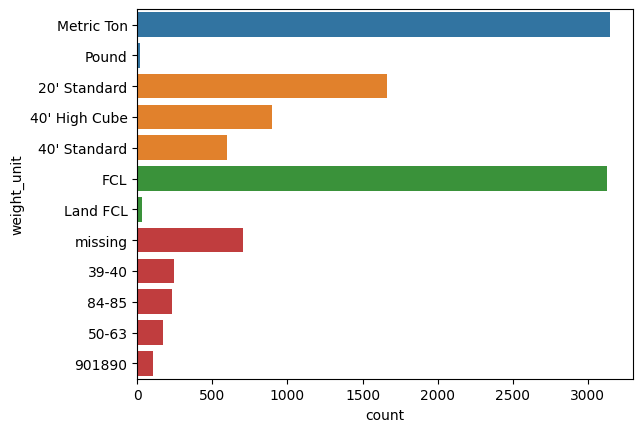

Column port_from_country has 14 unique values


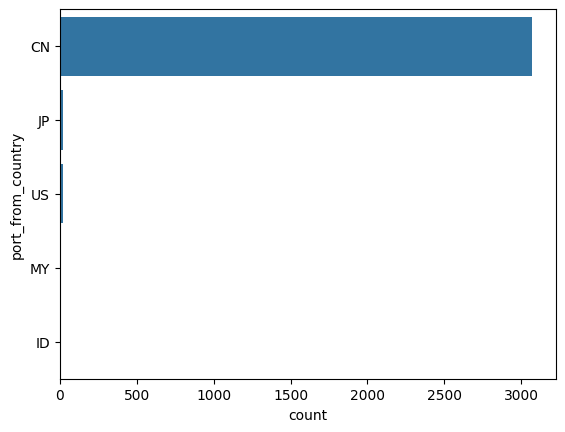

Column port_from has 85 unique values


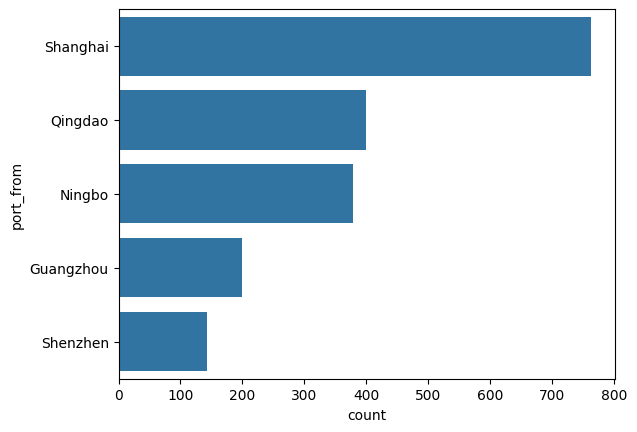

Column port_to_country has 23 unique values


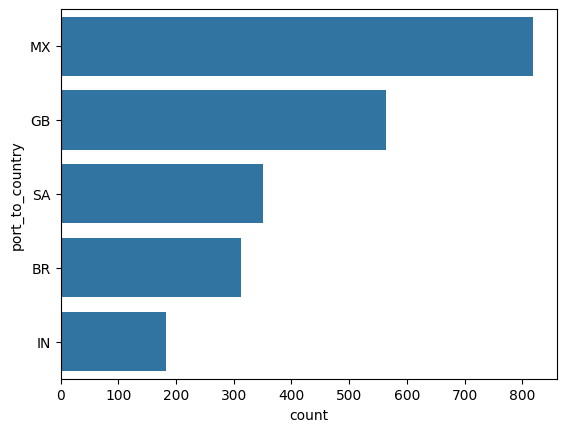

Column port_to has 100 unique values


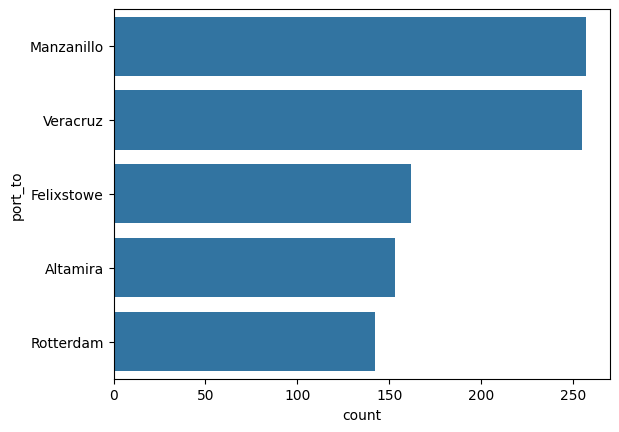

Column carrier has 12 unique values


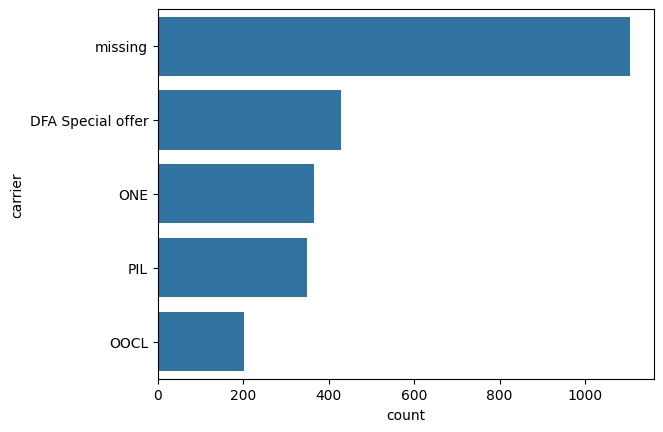

Column origin_name has 41 unique values


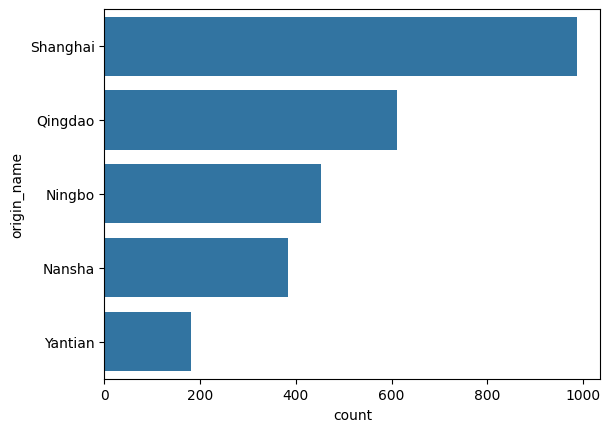

Column origin_code5 has 41 unique values


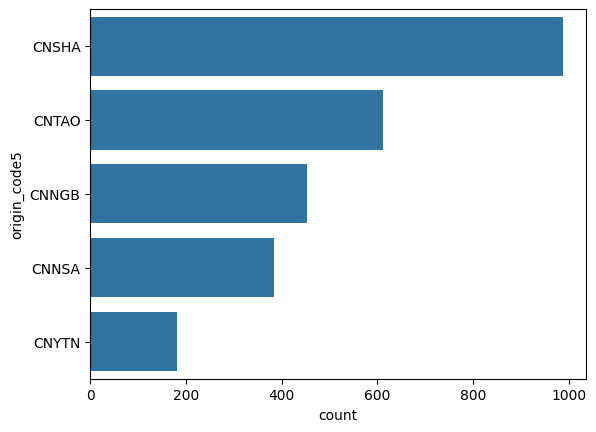

Column destination_name has 34 unique values


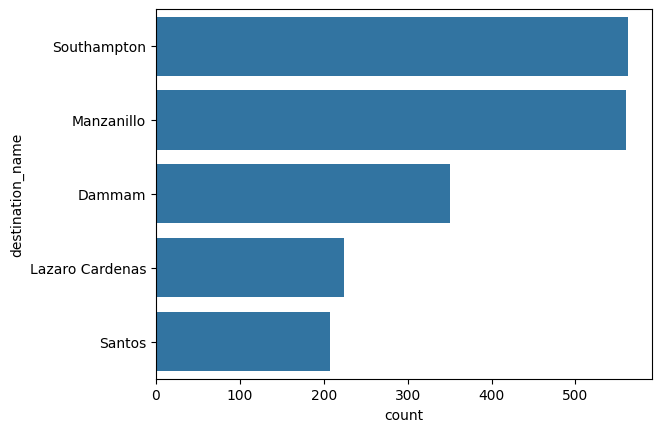

Column destination_code5 has 34 unique values


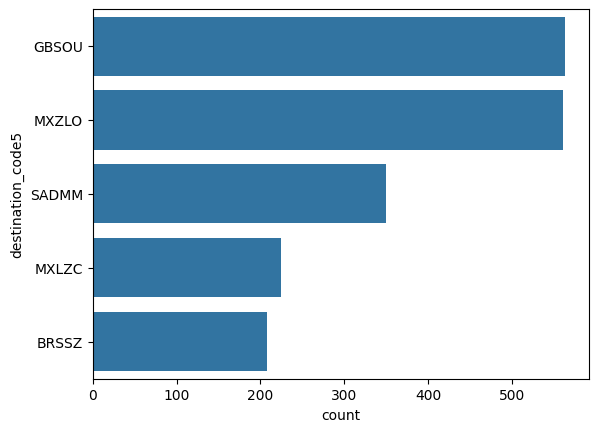

In [74]:
for col in object_cols:
    value_counts = df[col].value_counts()
    unique_values = len(value_counts)
    if unique_values < 10:
        sns.countplot(y=col, data=df)
    else:
        N = 5
        top_N = value_counts[:N]
        other = value_counts[N:].sum()
        sns.countplot(y=col, data=df, order=top_N.index)
        print(f'Column {col} has {unique_values} unique values')
        plt.show()



In [75]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns


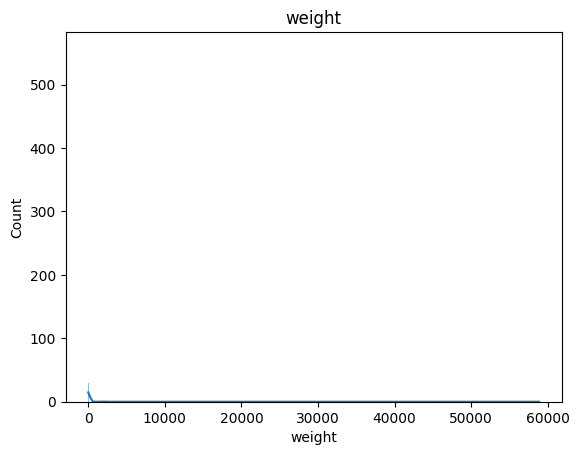

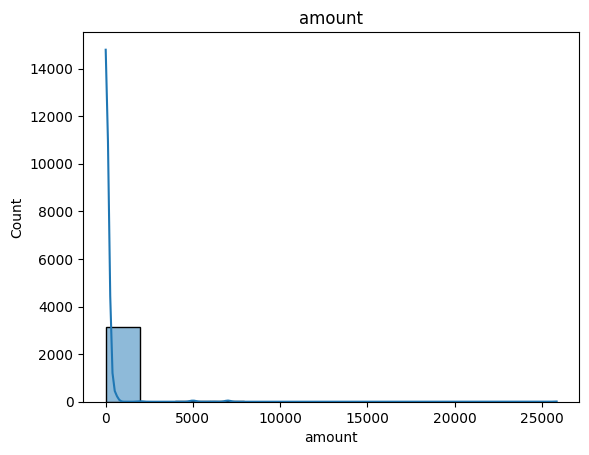

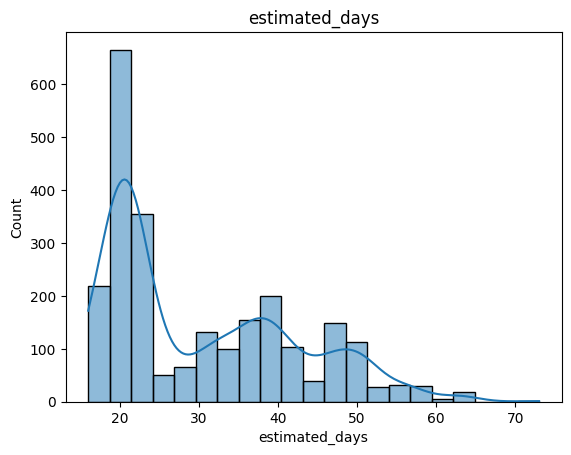

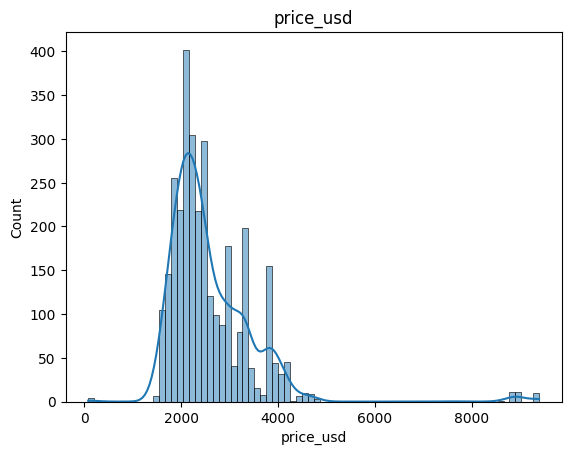

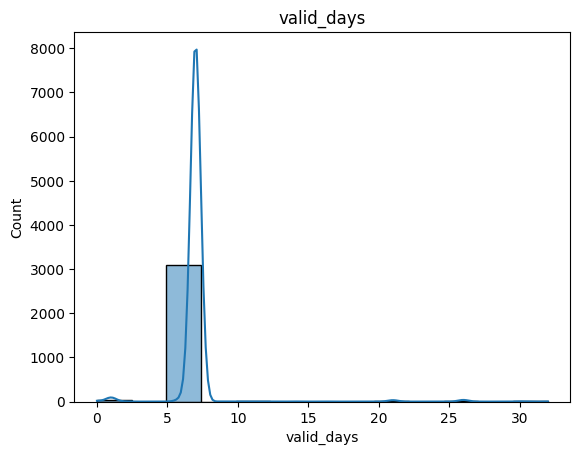

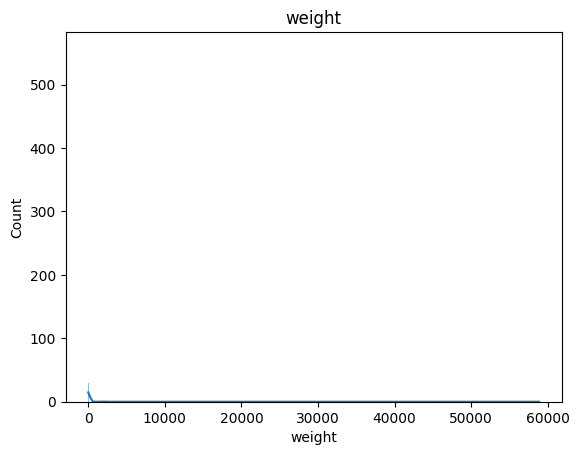

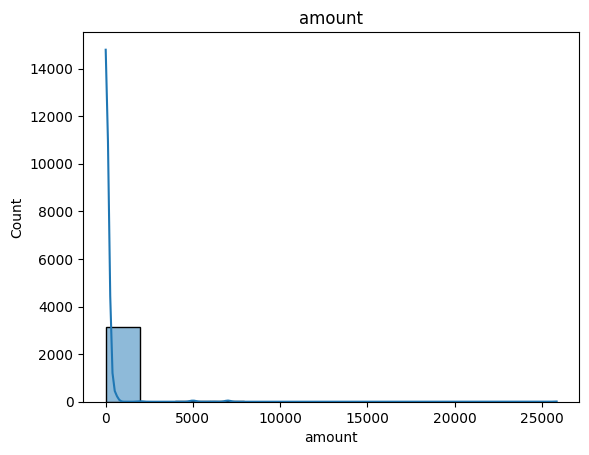

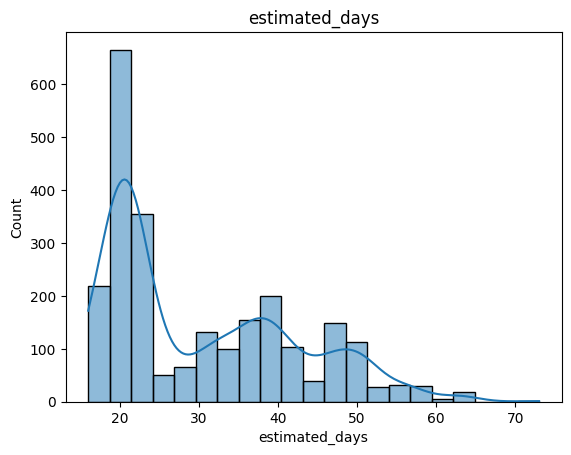

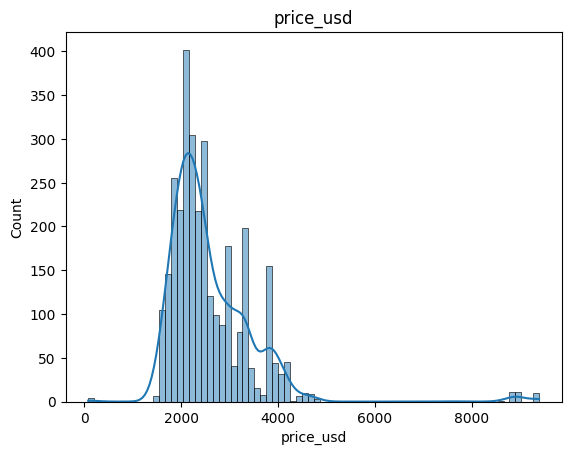

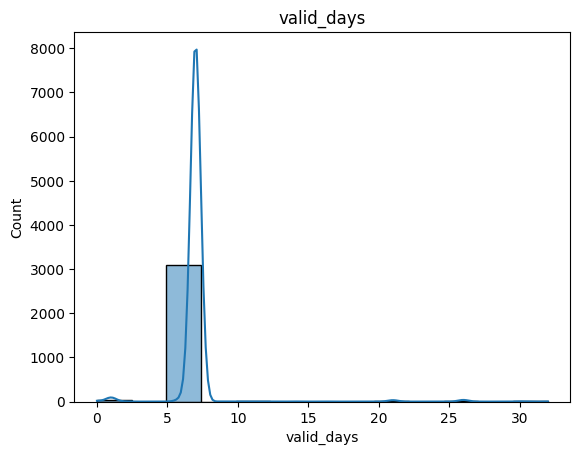

In [76]:
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


In [77]:
# Given values
wavelength = 633.0e-9  # Wavelength in meters
s = 0.300e-3  # Slit separation in meters
w = 4.50e-3  # Fringe separation in meters

# Calculate the distance D
D = (w * s) / wavelength
D*2

4.265402843601895

4.265402843601895

In [78]:
y_name = 'price_usd'
X = df.drop(columns=[y_name])
y = df[y_name]


In [79]:
X.head()

,request_date,weight,weight_unit,amount,container_type,shipping_type_x,hs_code,freight_all_kinds,personal_cargo,perishable_cargo,...,port_to,valid_from,valid_to,carrier,estimated_days,origin_name,origin_code5,destination_name,destination_code5,valid_days
2,2023-09-05,200.0,Metric Ton,1.0,20' Standard,FCL,missing,True,False,False,...,Caucedo,2024-03-03,2024-04-14,missing,42.0,Shanghai,CNSHA,Caucedo,DOCAU,7
3,2023-09-05,200.0,Metric Ton,1.0,20' Standard,FCL,missing,True,False,False,...,Caucedo,2024-03-15,2024-04-15,MSC,31.0,Shanghai,CNSHA,Caucedo,DOCAU,7
4,2023-09-05,200.0,Metric Ton,1.0,20' Standard,FCL,missing,True,False,False,...,Caucedo,2024-03-03,2024-04-14,OOCL,42.0,Shanghai,CNSHA,Caucedo,DOCAU,7
5,2023-09-05,200.0,Metric Ton,1.0,20' Standard,FCL,missing,True,False,False,...,Caucedo,2024-03-16,2024-04-28,missing,43.0,Shanghai,CNSHA,Caucedo,DOCAU,7
6,2023-09-05,200.0,Metric Ton,1.0,20' Standard,FCL,missing,True,False,False,...,Caucedo,2024-03-03,2024-04-14,missing,42.0,Shanghai,CNSHA,Caucedo,DOCAU,7


,request_date,weight,weight_unit,amount,container_type,shipping_type_x,hs_code,freight_all_kinds,personal_cargo,perishable_cargo,...,port_to,valid_from,valid_to,carrier,estimated_days,origin_name,origin_code5,destination_name,destination_code5,valid_days
2,2023-09-05,200.0,Metric Ton,1.0,20' Standard,FCL,missing,True,False,False,...,Caucedo,2024-03-03,2024-04-14,missing,42.0,Shanghai,CNSHA,Caucedo,DOCAU,7
3,2023-09-05,200.0,Metric Ton,1.0,20' Standard,FCL,missing,True,False,False,...,Caucedo,2024-03-15,2024-04-15,MSC,31.0,Shanghai,CNSHA,Caucedo,DOCAU,7
4,2023-09-05,200.0,Metric Ton,1.0,20' Standard,FCL,missing,True,False,False,...,Caucedo,2024-03-03,2024-04-14,OOCL,42.0,Shanghai,CNSHA,Caucedo,DOCAU,7
5,2023-09-05,200.0,Metric Ton,1.0,20' Standard,FCL,missing,True,False,False,...,Caucedo,2024-03-16,2024-04-28,missing,43.0,Shanghai,CNSHA,Caucedo,DOCAU,7
6,2023-09-05,200.0,Metric Ton,1.0,20' Standard,FCL,missing,True,False,False,...,Caucedo,2024-03-03,2024-04-14,missing,42.0,Shanghai,CNSHA,Caucedo,DOCAU,7


In [80]:
def normalize(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
numeric_cols = [col for col in X.columns if col != y_name and X[col].dtype in ['int', 'float']]

In [83]:
X_train_scaled, X_test_scaled = normalize(X_train[numeric_cols], X_test[numeric_cols])


In [84]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols)


<Axes: >

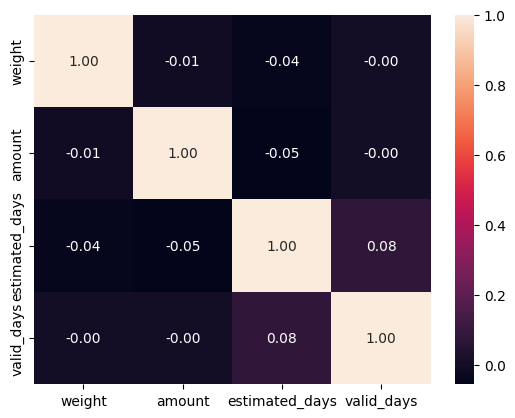

<Axes: >

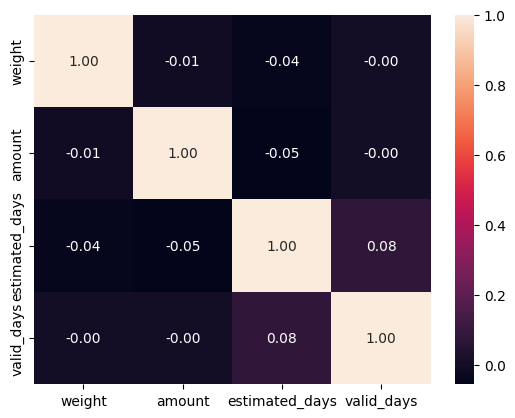

In [85]:
corr = X_train_scaled.corr()
sns.heatmap(corr, annot=True, fmt='.2f')


In [86]:
def perform_chi2_test(df: pd.DataFrame, alpha: float = 0.05) -> Dict[str, Tuple[float, float, int, bool]]:
    chi2_results = {}  # Словарь для хранения результатов теста chi2 для каждой пары столбцов

    columns = df.select_dtypes(include=['object']).columns  # Выбираем только категориальные столбцы
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):  # Обрабатываем каждую уникальную пару столбцов
            col1, col2 = columns[i], columns[j]
            contingency_table = pd.crosstab(df[col1], df[col2])  # Создаем таблицу сопряженности
            chi2_stat, p_value, dof, _ = chi2_contingency(contingency_table)  # Выполняем тест chi2
            is_significant = p_value < alpha  # Определяем, является ли результат статистически значимым
            chi2_results[f'{col1} vs {col2}'] = (chi2_stat, p_value, dof, is_significant)  # Сохраняем результаты теста chi2

    return chi2_results


chi2_results = perform_chi2_test(X_train, alpha=0.05)
for pair, result in chi2_results.items():
    chi2_stat, p_value, dof, is_significant = result
    print(f'Результат {pair}:\nChi2 Stat: {chi2_stat}, P Value: {p_value}, Degrees of Freedom: {dof}, Significant: {is_significant}\n')

Результат request_date vs weight_unit:
Chi2 Stat: 832.5615001067231, P Value: 2.5367151611695013e-99, Degrees of Freedom: 139, Significant: True

Результат request_date vs container_type:
Chi2 Stat: 3022.6117459611864, P Value: 0.0, Degrees of Freedom: 278, Significant: True

Результат request_date vs shipping_type_x:
Chi2 Stat: 1252.1979029456036, P Value: 2.4880218254932264e-178, Degrees of Freedom: 139, Significant: True

Результат request_date vs hs_code:
Chi2 Stat: 159765.91963648045, P Value: 0.0, Degrees of Freedom: 25576, Significant: True

Результат request_date vs port_from_country:
Chi2 Stat: 7689.031327274156, P Value: 0.0, Degrees of Freedom: 1668, Significant: True

Результат request_date vs port_from:
Chi2 Stat: 60688.11002239912, P Value: 0.0, Degrees of Freedom: 11120, Significant: True

Результат request_date vs port_to_country:
Chi2 Stat: 23018.613610271626, P Value: 0.0, Degrees of Freedom: 2919, Significant: True

Результат request_date vs port_to:
Chi2 Stat: 92022

In [87]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

MLA = [
    RandomForestRegressor(),
    tree.DecisionTreeRegressor(),
    XGBRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

def compare_algorithms2df(MLA, X_train, X_test, y_train, y_test):
    MLA_columns = ['MLA Name', 'MLA Train R2 Score', 'MLA Test R2 Score', 'MLA Mean Absolute Error', 'MLA Mean Squared Error', 'MLA R2 Score', 'Error']
    MLA_compare = pd.DataFrame(columns = MLA_columns)

    row_index = 0
    for alg in MLA:
        try:
            alg.fit(X_train, y_train)
            predicted = alg.predict(X_test)

            MLA_name = alg.__class__.__name__
            MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
            MLA_compare.loc[row_index, 'MLA Train R2 Score'] = round(alg.score(X_train, y_train), 4)
            MLA_compare.loc[row_index, 'MLA Test R2 Score'] = round(alg.score(X_test, y_test), 4)
            MLA_compare.loc[row_index, 'MLA Mean Absolute Error'] = mean_absolute_error(y_test, predicted)
            MLA_compare.loc[row_index, 'MLA Mean Squared Error'] = mean_squared_error(y_test, predicted)
            MLA_compare.loc[row_index, 'MLA R2 Score'] = r2_score(y_test, predicted)
        except Exception as e:
            MLA_name = alg.__class__.__name__
            MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
            MLA_compare.loc[row_index, 'Error'] = str(e)

        row_index += 1

    MLA_compare.sort_values(by = ['MLA R2 Score', 'Error'], ascending = [False, True], inplace = True)
    return MLA_compare


In [88]:
compare_algorithms2df(MLA, X_train_scaled, X_test_scaled, y_train, y_test)

,MLA Name,MLA Train R2 Score,MLA Test R2 Score,MLA Mean Absolute Error,MLA Mean Squared Error,MLA R2 Score,Error
2,XGBRegressor,0.4256,0.1991,411.080919,575627.285474,0.199064,NaN
0,RandomForestRegressor,0.4259,0.1831,412.396997,587134.104655,0.183054,NaN
1,DecisionTreeRegressor,0.4415,0.0621,429.873775,674037.536324,0.062135,NaN
3,AdaBoostRegressor,NaN,NaN,NaN,NaN,NaN,Input X contains NaN.\nAdaBoostRegressor does ...
4,GradientBoostingRegressor,NaN,NaN,NaN,NaN,NaN,Input X contains NaN.\nGradientBoostingRegress...


,MLA Name,MLA Train R2 Score,MLA Test R2 Score,MLA Mean Absolute Error,MLA Mean Squared Error,MLA R2 Score,Error
2,XGBRegressor,0.4256,0.1991,411.080919,575627.285474,0.199064,NaN
0,RandomForestRegressor,0.4256,0.19,408.728992,582114.36048,0.190038,NaN
1,DecisionTreeRegressor,0.4413,0.0672,429.483677,670367.695942,0.067241,NaN
3,AdaBoostRegressor,NaN,NaN,NaN,NaN,NaN,Input X contains NaN.\nAdaBoostRegressor does ...
4,GradientBoostingRegressor,NaN,NaN,NaN,NaN,NaN,Input X contains NaN.\nGradientBoostingRegress...


# Reinforcement Learning

In [90]:
# Шаг 1: Интеграция и предварительная обработка данных
# Сначала нам необходимо объединить ваши данные по отправлениям с тарифами на транспортировку. Это позволит агенту обучения с подкреплением понять доступные варианты для каждого запроса на отправку и их последствия с точки зрения стоимости и времени.


In [93]:
# Пример объединения данных по отправлениям с тарифами на авиаперевозки
# Вам нужно будет выполнить аналогичное объединение для тарифов на наземные и морские перевозки
merged_leads_land_not_null


,request_id,request_date,valid_date_from,valid_date_to,weight,weight_unit,amount,container_type,shipping_type_x,hs_code,...,valid_to,carrier,estimated_days,origin_name,origin_code5,destination_name,destination_code5,shipping_type_y,load_amount,price_usd
2,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,2024-04-14,NaN,42.0,Shanghai,CNSHA,Caucedo,DOCAU,FCL,1.0,3467.0
3,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,2024-04-15,MSC,31.0,Shanghai,CNSHA,Caucedo,DOCAU,FCL,1.0,3420.0
4,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,2024-04-14,OOCL,42.0,Shanghai,CNSHA,Caucedo,DOCAU,FCL,1.0,3288.0
5,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,2024-04-28,NaN,43.0,Shanghai,CNSHA,Caucedo,DOCAU,FCL,1.0,3087.0
6,855664,2023-09-05,2023-09-05,2023-09-12,200.00,Metric Ton,1.0,20' Standard,FCL,NaN,...,2024-04-14,NaN,42.0,Shanghai,CNSHA,Caucedo,DOCAU,FCL,1.0,3087.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12527,941621,2024-03-05,2024-03-08,2024-03-15,2.40,Metric Ton,1.0,20' Standard,FCL,851631,...,2024-04-24,ONE,51.0,Yantian,CNYTN,Southampton,GBSOU,FCL,1.0,2043.0
12546,941675,2024-03-05,2024-03-05,2024-03-12,0.76,Metric Ton,25845.0,40' Standard,FCL,50-63,...,2024-04-15,NaN,38.0,Ningbo,CNNGB,Cartagena,COCTG,FCL,1.0,3414.0
12547,941675,2024-03-05,2024-03-05,2024-03-12,0.76,Metric Ton,25845.0,40' Standard,FCL,50-63,...,2024-04-22,COSCO,39.0,Ningbo,CNNGB,Cartagena,COCTG,FCL,1.0,3400.0
12552,941690,2024-03-05,2024-04-05,2024-04-12,10.00,Metric Ton,1.0,40' Standard,FCL,84-85,...,2024-04-15,NaN,38.0,Ningbo,CNNGB,Cartagena,COCTG,FCL,1.0,3414.0


In [103]:
merged_leads_land_not_null.columns

Index(['request_id', 'request_date', 'valid_date_from', 'valid_date_to',
       'weight', 'weight_unit', 'amount', 'container_type', 'shipping_type_x',
       'hs_code', 'freight_all_kinds', 'personal_cargo', 'perishable_cargo',
       'liquid_cargo', 'imo_code', 'city_from_country', 'city_from',
       'port_from_country', 'port_from', 'port_to_country', 'port_to',
       'city_to_country', 'city_to', 'create_date', 'valid_from', 'valid_to',
       'carrier', 'estimated_days', 'origin_name', 'origin_code5',
       'destination_name', 'destination_code5', 'shipping_type_y',
       'load_amount', 'price_usd'],
      dtype='object')

In [95]:
# Шаг 2: Определение пространства состояний
# Состояние может включать различные характеристики из объединенного набора данных, такие как:
#
# Информация об отправлении и назначении
# Вес и тип контейнера
# Дата запроса и диапазон действительных дат
# Любые другие релевантные детали отправления
# Вам может потребоваться закодировать эти характеристики в числовой формат, подходящий для алгоритма обучения с подкреплением.
#
# Шаг 3: Определение пространства действий
# Пространство действий будет состоять из выбора одного из доступных методов транспортировки (и потенциально конкретных вариантов в рамках этих методов, таких как перевозчики или маршруты). Если вы объединили данные по всем типам транспортировки, действие на каждом шаге будет заключаться в выборе строки (то есть конкретного тарифа и метода транспортировки).
#
# Шаг 4: Определение функции вознаграждения
# Функция вознаграждения должна мотивировать агента минимизировать стоимость и время, учитывая другие факторы, такие как надежность или воздействие на окружающую среду. Например:
#
# Вознаграждение = - (Нормализованная стоимость + Нормализованное время)
# Вы можете ввести штрафы за позднюю дШаг 2: Определение пространства состояний
# Состояние может включать различные характеристики из объединенного набора данных, такие как:
#
# Информация об отправлении и назначении
# Вес и тип контейнера
# Дата запроса и диапазон действительных дат
# Любые другие релевантные детали отправления
# Вам может потребоваться закодировать эти характеристики в числовой формат, подходящий для алгоритма обучения с подкреплением.
#
# Шаг 3: Определение пространства действий
# Пространство действий будет состоять из выбора одного из доступных методов транспортировки (и потенциально конкретных вариантов в рамках этих методов, таких как перевозчики или маршруты). Если вы объединили данные по всем типам транспортировки, действие на каждом шаге будет заключаться в выборе строки (то есть конкретного тарифа и метода транспортировки).
#
# Шаг 4: Определение функции вознаграждения
# Функция вознаграждения должна мотивировать агента минимизировать стоимость и время, учитывая другие факторы, такие как надежность или воздействие на окружающую среду. Например:
#
# Вознаграждение = - (Нормализованная стоимость + Нормализованное время)
# Вы можете ввести штрафы за позднюю доставку или бонусы за выбор экологически чистых вариантов.
#
# Шаг 5: Обучение агента RL
# Вы можете использовать Q-learning, SARSA или Deep Q-Networks (DQN) для обучения вашего агента. Выбор алгоритма зависит от сложности вашего пространства состояний и действий. Если они очень большие, вам может потребоваться использовать DQN или другие методы, основанные на глубоком обучении.оставку или бонусы за выбор экологически чистых вариантов.
#
# Шаг 5: Обучение агента RL
# Вы можете использовать Q-learning, SARSA или Deep Q-Networks (DQN) для обучения вашего агента. Выбор алгоритма зависит от сложности вашего пространства состояний и действий. Если они очень большие, вам может потребоваться использовать DQN или другие методы, основанные на глубоком обучении.
# Шаг 6: Оценка агента
# После обучения вы должны оценить эффективность вашего агента с точки зрения общих вознаграждений и сравнить его с базовыми стратегиями, такими как всегда выбирать самый дешевый или самый быстрый вариант.
#
# Реализация среды RL
# Реализация среды RL (env) требует определения поведения функций reset() и step(action), которое, в свою очередь, зависит от того, как вы структурировали свои пространства состояний и действий и интегрировали свои данные.


In [107]:
import numpy as np
import pandas as pd

class LogisticsEnv:
    def __init__(self, data):
        self.data = data
        self.n_steps = data.shape[0]
        self.current_step = None
        self.done = None
        self.total_rewards = None
        self.reset()

    def reset(self):
        self.current_step = 0
        self.done = False
        self.total_rewards = 0
        return self.current_step

    def step(self, action):
        reward = -self.data.iloc[self.current_step]['price_usd']
        self.total_rewards += reward

        self.current_step += 1
        if self.current_step >= self.n_steps:
            self.done = True
            self.current_step = self.n_steps - 1  # Удерживаем индекс в пределах диапазона

        return self.current_step, reward, self.done, {}

class QLearningAgent:
    def __init__(self, n_states, n_actions, lr=0.1, gamma=0.99, epsilon=0.1):
        self.n_states = n_states
        self.n_actions = n_actions
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((n_states, n_actions))

    def choose_action(self, state_index):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            return np.argmax(self.q_table[state_index])

    def update_q_table(self, state_index, action, reward, next_state_index, done):
        if not done:
            best_next_action = np.argmax(self.q_table[next_state_index])
            td_target = reward + self.gamma * self.q_table[next_state_index, best_next_action]
        else:
            td_target = reward  # Если эпизод завершен, цель для TD обновления - просто полученная награда

        td_error = td_target - self.q_table[state_index, action]
        self.q_table[state_index, action] += self.lr * td_error

# Создание среды и агента
env = LogisticsEnv(merged_leads_land_not_null)
agent = QLearningAgent(n_states=env.n_steps, n_actions=3)  # Предполагаем 3 возможных действия

# Процесс обучения агента
n_episodes = 2
for episode in range(n_episodes):
    state_index = env.reset()
    done = False

    while not done:
        action = agent.choose_action(state_index)
        next_state_index, reward, done, _ = env.step(action)
        agent.update_q_table(state_index, action, reward, next_state_index, done)
        if not done:
            state_index = next_state_index


In [108]:
# 1. Оценка средней награды
total_rewards = []
for episode in range(n_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.choose_action(state)
        state, reward, done, _ = env.step(action)
        total_reward += reward

    total_rewards.append(total_reward)

average_reward = sum(total_rewards) / n_episodes
print(f"Средняя награда за эпизод: {average_reward}")



Средняя награда за эпизод: -8235689.877564887


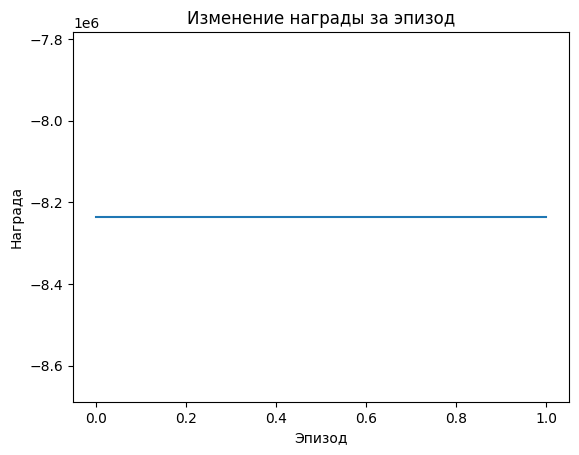

In [109]:
# 2. Визуализация изменения награды
import matplotlib.pyplot as plt

plt.plot(total_rewards)
plt.title('Изменение награды за эпизод')
plt.xlabel('Эпизод')
plt.ylabel('Награда')
plt.show()


In [110]:
# 3. Проверка стратегии агента
for state_index in range(env.n_steps):
    best_action = np.argmax(agent.q_table[state_index])
    print(f"Лучшее действие для состояния {state_index} - {best_action}")


Лучшее действие для состояния 0 - 2
Лучшее действие для состояния 1 - 2
Лучшее действие для состояния 2 - 2
Лучшее действие для состояния 3 - 2
Лучшее действие для состояния 4 - 2
Лучшее действие для состояния 5 - 2
Лучшее действие для состояния 6 - 2
Лучшее действие для состояния 7 - 1
Лучшее действие для состояния 8 - 2
Лучшее действие для состояния 9 - 2
Лучшее действие для состояния 10 - 2
Лучшее действие для состояния 11 - 2
Лучшее действие для состояния 12 - 2
Лучшее действие для состояния 13 - 2
Лучшее действие для состояния 14 - 1
Лучшее действие для состояния 15 - 2
Лучшее действие для состояния 16 - 2
Лучшее действие для состояния 17 - 2
Лучшее действие для состояния 18 - 2
Лучшее действие для состояния 19 - 2
Лучшее действие для состояния 20 - 2
Лучшее действие для состояния 21 - 2
Лучшее действие для состояния 22 - 2
Лучшее действие для состояния 23 - 2
Лучшее действие для состояния 24 - 2
Лучшее действие для состояния 25 - 2
Лучшее действие для состояния 26 - 2
Лучшее дейс